# Unsupervised Learning

### A. Inspect the Dataset 
In this coding lab, we'll work with a Spotify dataset. Our goal is to use features of songs to separate them into genres. However, we do not know the genre of each song in the dataset (i.e. we don't have labels), so this is an unsupervised learning task. To get started, read about the dataset here: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download 

What features do you think will be most helpful in separating songs? What features do you think will best help us create groups for the songs (i.e. genre)? 

### B. Load the Data 
**Instructions**
1. Load `pandas` 
2. Read in `spotify.csv` using the `read_csv` function.

In [3]:
import pandas as pd
spotify = pd.read_csv('spotify.csv')

### C: Inspect the Data 
**Instructions** 
1. Print the shape of the dataset. Interpret the shape. 
2. Use the `pd.set_option` function so that you can view all columns of the dataset. Use .head() to view the first few columns. What do you notice about the features? 

I noticed that there are many features to this dataset (21) that span from speechiness to whether it is explicit or not.Some are integers while some are characters. I see the first row with is the label names as being unnamed.

In [4]:
# 1. Print shape
print(f"Dataset Shape: {spotify.shape}")

# 2. Set options to see all columns and look at the data
pd.set_option('display.max_columns', None)
print(spotify.head())

Dataset Shape: (114000, 21)
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          5

### D: Sample the Data 
**Instructions**
1. For efficient analysis, it's often quickest to set up the pipeline by sampling the main dataset. Use `.sample()` method to sample 1000 rows. Use the `random_state` method for reproducibility. 



In [ ]:
# Sample 1000 rows for speed
spotify_sample = spotify.sample(n=1000, random_state=42)


### E: Subset to Key Variables 
**Instructions**
1. Subset the dataset to the following variables: `popularity`, `duration_ms`, `explicit`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, and `time_signature`. 
2. Convert `explicit` to a binary indicator. 

In [6]:
# Subset columns
features = ['popularity', 'duration_ms', 'explicit', 'danceability', 
            'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo', 'time_signature']

spotify_subset = spotify_sample[features].copy()

# Convert 'explicit' to indicator variable 
spotify_subset['explicit'] = spotify_subset['explicit'].astype(int)


### F: Standardize the Data 
**Instructions**
1. Use `StandardScaler()` to standardize the data. 


In [7]:
# Import Standard Scaler Function 
from sklearn.preprocessing import StandardScaler


# Apply Standard Scaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spotify_subset)


### G: PCA Analysis 
**Instructions** 
1. Use the scikit-learn PCA function to transform the scaled data to PCA version. 

In [8]:
# Import PCA Function 
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

### H: Create Scree Plot 
**Instructions**
1. Using the `pyplot` function, create a scree plot. This plot should have `pca.explained_variance_ratio_` on the y axis. On the x axis, you should list the number of the dimension from the `pca.explained_variance_ratio_`: the first dimension corresponds to the first entry in y, the second dimensions corresponds to the second entry in y and so on.

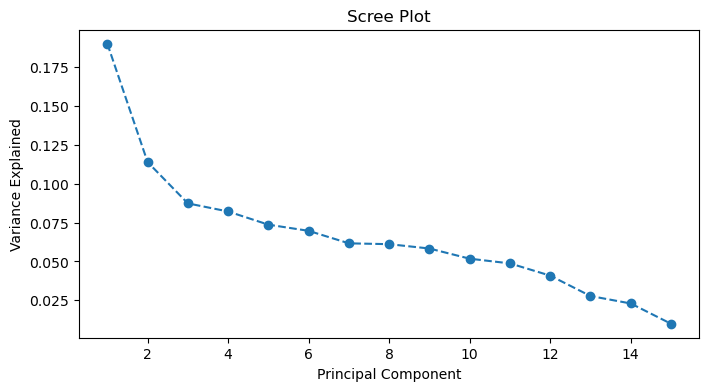

In [21]:
# Import Package 
import matplotlib.pyplot as plt
 
# Scree plot (Explained variance by each principal component)
plt.figure(figsize=(8, 4))
plt.plot(range(1, 16), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


I would say this looks more like a bend than an elbow. Using the -- looked better than the - linestyle

### I: Plot First Two Principal Components 
**Instructions**
1. Using `pyplot`, create a plot where each dot represents a song. The x axis is the first principal component of your PCA decomposition, and the y axis is the second principal component of your PCA decomposition. To access these indices, use the syntax `[:, 0]` and `[:, 1]` with your PCA object. 


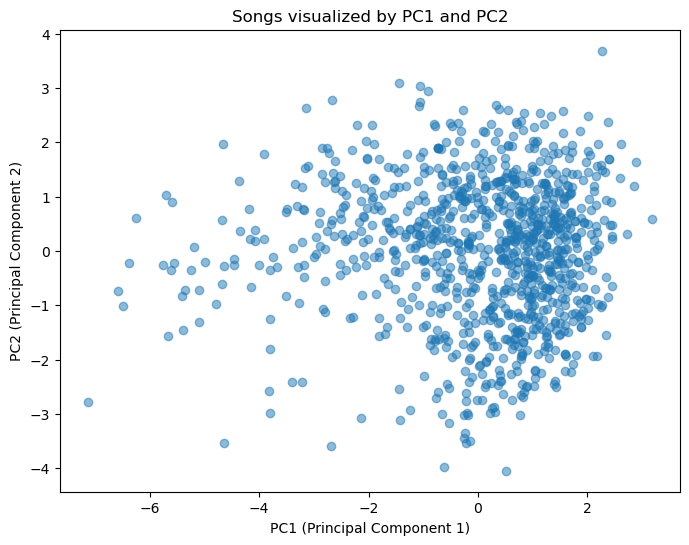

In [ ]:
# Visualize the data using the first two principal components
# first two components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')
plt.title('Songs visualized by PC1 and PC2')
plt.show()


### J. Visualize PCA Loadings
1. Access the PCA loadings using `.components_`
2. Save the loadings of the first two PCA components as a pandas DataFrame. Use the `columns` argument, and specify the columns from the spotify dataset. Specify the index as `['PC1', 'PC2']`.  
3. Create a pyplot with `pc_loadings.T.plot(kind='bar', figsize=(10, 6))` to visualize the PCA loadings. 

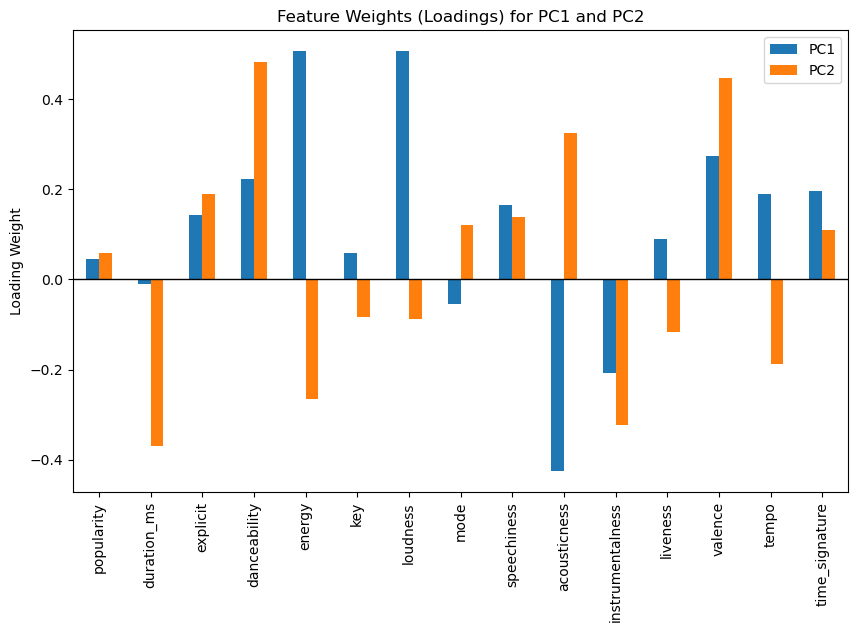

In [ ]:
# Get the loadings (weights of each feature for each principal component)
loadings = pca.components_

# Create a DataFrame for better visualization
pc_loadings = pd.DataFrame(loadings[:2], 
                           columns=features, 
                           index=['PC1', 'PC2'])

# Visualize the loadings as a bar plot
pc_loadings.T.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Weights (Loadings) for PC1 and PC2')
plt.axhline(0, color='black', linewidth=1) # Adds a "zero line" for clarity
plt.ylabel('Loading Weight')
plt.show()


### K: Interpreting PCA Components   
1. **How would you interpret these first two principal components?**

I would interpret the first two principal components as having high amounts of energy and loudness. Valence for PC2 is high.Large acousticness negative bar for PC1. PC2 has a very dancable and happy tone. PC1 represents the intesnity of the song while PC2 has the representation of mood.

### L: Preform KMeans Clustering on PCA Components 
**Instructions**
1. Use the `KMeans` function scikit-learn. 
2. Apply the function to the first 8 PCA components, and specify 5 clusters. 
3. Add a column with predicted clusters to your spotify sample. 
4. Visualize your results using matplot lib. The x and y axis should be the first and second principal components. Use the predicted clusters to color each point. 
5. Print out some examples of songs and genres from each cluster. What do you think each cluster represents? 

I think each cluster represents a setting where a song could be played. I would probably not see metalcore and disco being played in the same playlist, but would see rnb also played, as seen in cluster 0. I see two Japanese songs in cluster 1, and a few Portugese songs in cluster 0.  Perhaps its the energy that each gives becasue in cluster 3 I see some lower energy or toned down performances of reggae and comedy as well as one kids song.

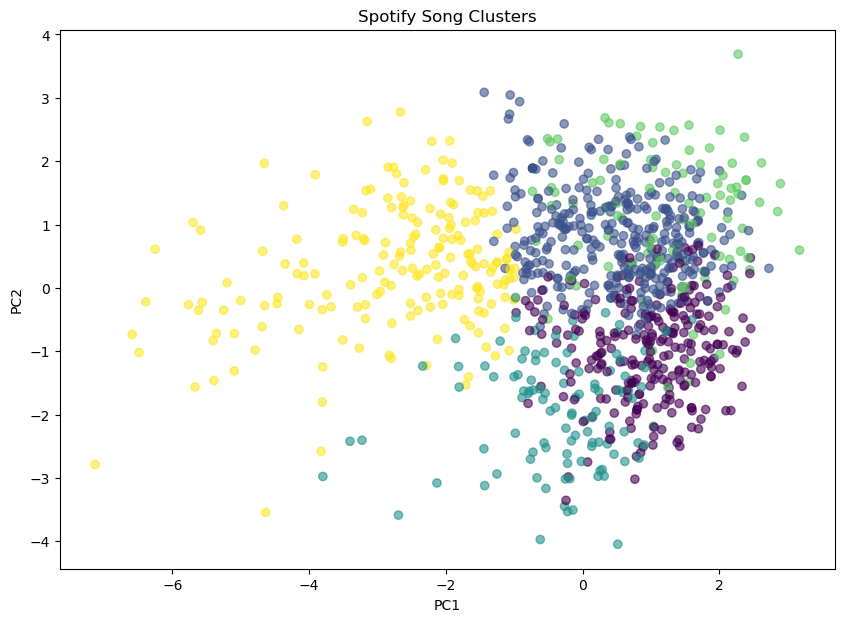


 Cluster 0 Examples 
                                              track_name track_genre
96815                             Jah Jah Revolta, Pt. 2       samba
72760                                  A Form of Protest   metalcore
87169                Proibida Pra Mim (Grazon) - Ao Vivo       r-n-b
77161  Pega pega (Participação especial de Jojo Maron...      pagode
49636  Me Gabber - DJ Paul Elstak & The BeatKrusher R...   hardstyle

 Cluster 1 Examples 
                              track_name track_genre
91368                    Merry Christmas        rock
61000                              月の大きさ      j-idol
25788             I'm Ready - Radio Edit       disco
62735                              時間がない       j-pop
96569  Vi Mamãe Oxum Na Cachoeira - Live       samba

 Cluster 2 Examples 
                  track_name    track_genre
113186         No Other Name    world-music
42819         Failed Organum      grindcore
17567         Machine Spirit           club
13741           Time To Ja

In [13]:
# Import Package 
from sklearn.cluster import KMeans

# Set the number of clusters and principal components to use
num_clusters = 5
num_pca_components = 8

# Perform K-means clustering using the first 8 principal components
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data[:, :num_pca_components])

# Add cluster labels to the sample DataFrame 
spotify_sample['cluster'] = cluster_labels

# Visualization of clusters using the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title('Spotify Song Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Manually Inspect Songs in Clusters 
for i in range(num_clusters):
    print(f"\n Cluster {i} Examples ")
    print(spotify_sample[spotify_sample['cluster'] == i][['track_name', 'track_genre']].head(5))


Transcript from Gemini: https://gemini.google.com/share/48ac099a9b4f